# Problem Domain and Dataset Preparation

Violence against women and girls is a huge problem around the world, and it impacts society in so many ways. Looking at the data around this kind of violence really matters for a few reasons. First, it helps us see patterns and trends, which means policymakers, social services, and law enforcement can figure out where to put resources and how to prevent it better. By digging into details—like where this violence happens, who it affects most, and what types are common—we can start understanding why it’s happening and tackle it at the roots.
For this assignment, checking out the data will help us see important trends and factors, which can spark real conversations and lead to practical ideas. The analysis can spotlight areas that need attention right now and guide future research or efforts, which fits with global goals like the United Nations' Sustainable Development Goals, especially Goal 5 on Gender Equality and Goal 16 on Peace, Justice, and Strong Institutions.
Plus, violence against women has serious effects on health, the economy, and mental well-being for both individuals and communities. It can cause long-term health issues, lower productivity, and lead to higher social and medical costs. In a community, a lot of violence can create fear, weaken trust, and break down social bonds. Tackling these problems needs solid data to steer our actions, and analyzing it is a big step toward making our communities safer.

# Description of the Dataset

Regarding Violence Against Girls and Women

The goal of the Demographic and Health Surveys (DHS) Program is to improve knowledge of population trends and health in developing nations worldwide.
"One of the most pervasive, enduring, and catastrophic human rights violations in our world today," according to the UN, is violence against women and girls (VAWG). Because of the stigma, shame, quiet, and impunity surrounding it, it goes mostly undetected.
Generally speaking, it can take the following forms:  sexual violence and harassment (rape, forced sexual acts, unwanted sexual advances, child sexual abuse, forced marriage, street harassment, stalking, cyber-harassment), intimate partner violence (battering, psychological abuse, marital rape, femicide), and human trafficking (slavery, sexual exploitation), child marriage or female genital mutilation


About the Data

The information came from a poll of men and women in South American, Asian, and African nations that examined their perspectives and the reasons they said were offered for harming women. The information also examines the respondents' various sociodemographic categories, such as age group, employment, marital status, and education level.
Therefore, in order to convey the message that violence against women and girls is never acceptable or justified, it is imperative that the nations where these viewpoints are prevalent give public awareness campaigns and educational opportunities for women and girls top priority. 

In [ ]:
# Reading the dataset

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
data = pd.read_csv("Violence Against Women  Girls Data.csv")

# Displaying the first few rows
print("Initial Dataset:")
print(data.head())
print(data.columns)

# Step 1: Check for missing values
print("\nMissing Values:")
# Count missing values per column
print(data.isnull().sum())  

# Fill missing values with 0
data.fillna(0, inplace=True)

# Step 2: Check for outliers using the IQR method
Q1 = data.quantile(0.25)  # First quartile
Q3 = data.quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range

# Filter out rows with outliers
df_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nData after removing outliers:")
print(df_cleaned.describe())

# Step 3: Verify data types
print("\nData Types:")
print(df_cleaned.dtypes)

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset_0.csv", index=False)


Initial Dataset:
   RecordID      Country Gender Demographics Question  \
0         1  Afghanistan      F        Marital status   
1         1  Afghanistan      F             Education   
2         1  Afghanistan      F             Education   
3         1  Afghanistan      F             Education   
4         1  Afghanistan      F        Marital status   

          Demographics Response                   Question Survey Year  Value  
0                 Never married  ... if she burns the food  01/01/2015    NaN  
1                        Higher  ... if she burns the food  01/01/2015   10.1  
2                     Secondary  ... if she burns the food  01/01/2015   13.7  
3                       Primary  ... if she burns the food  01/01/2015   13.8  
4  Widowed, divorced, separated  ... if she burns the food  01/01/2015   13.8  
Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value'],
      dtype='object')

Mis

C:\Users\charl\AppData\Local\Temp\ipykernel_13856\2198399420.py:59: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)  # First quartile
C:\Users\charl\AppData\Local\Temp\ipykernel_13856\2198399420.py:60: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)  # Third quartile
C:\Users\charl\AppData\Local\Temp\ipykernel_13856\2198399420.py:64: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = data[~((data < (Q1 - 1.5 * IQR))

In [15]:
 # Exploratory Data Analysis


Summary Statistics (including 0s as valid values):
           RecordID         Value
count  12329.000000  12329.000000
mean     208.104712     16.408452
std      120.626774     15.511202
min        1.000000      0.000000
25%      103.000000      3.500000
50%      208.000000     11.700000
75%      311.000000     25.600000
max      420.000000     61.400000


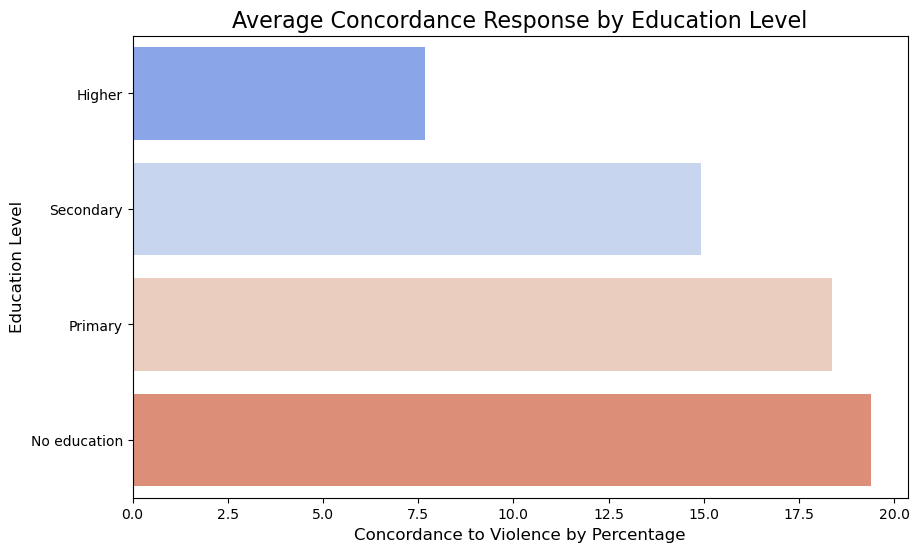

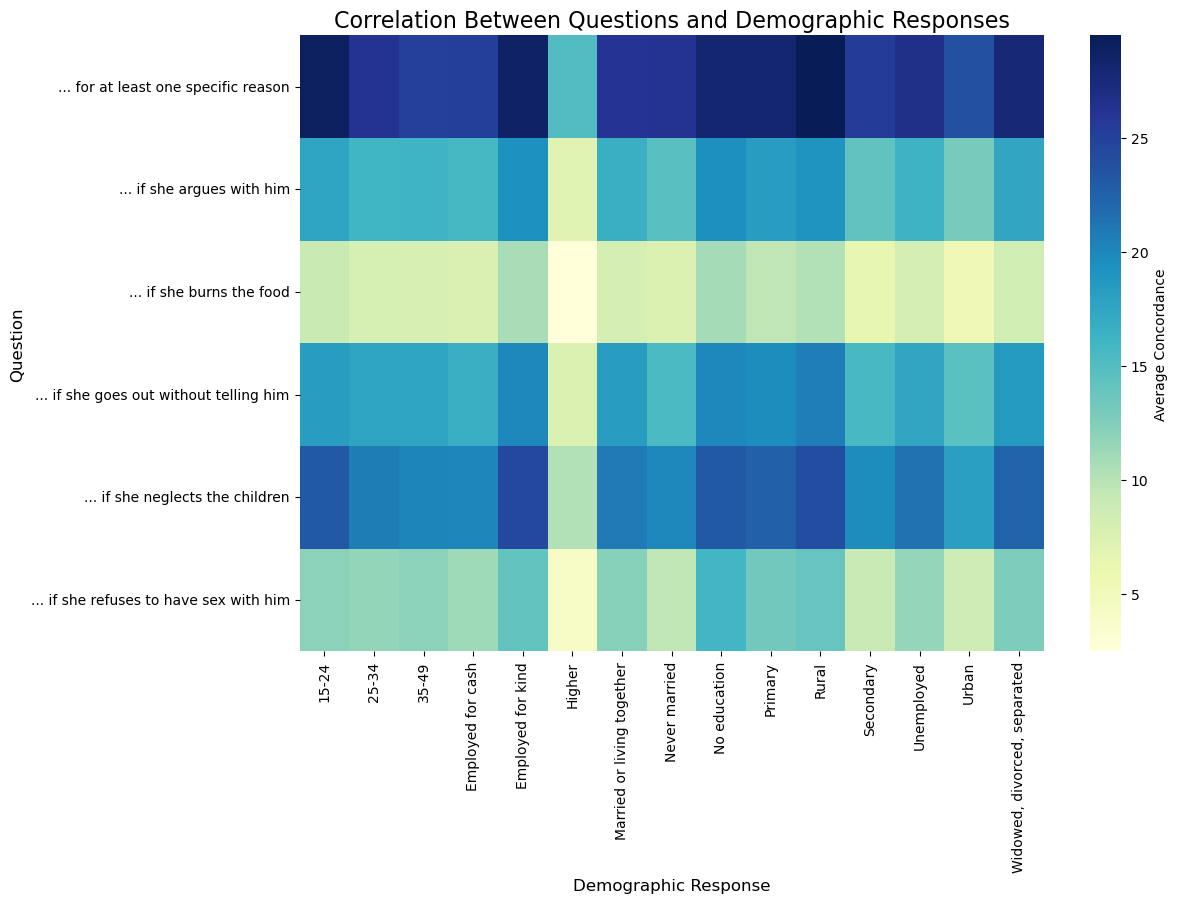

In [15]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reload cleaned dataset
df = pd.read_csv("cleaned_dataset_0.csv")

# Step 1: Summary statistics
print("\nSummary Statistics (including 0s as valid values):")
print(df.describe())  # Automatically includes 0 values as valid

# Step 2: Visualizations

# Responses by education level (including 0 values as valid)
education_data = df[df['Demographics Question'] == 'Education']
education_group = education_data.groupby('Demographics Response')['Value'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=education_group.values, y=education_group.index, palette='coolwarm')
plt.title('Average Concordance Response by Education Level', fontsize=16)
plt.xlabel('Concordance to Violence by Percentage', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.show()

# Correlation between demographics and specific questions (including 0 values as valid)
question_demographics = df.groupby(['Question', 'Demographics Response'])['Value'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(question_demographics, cmap='YlGnBu', cbar_kws={'label': 'Average Concordance'})
plt.title('Correlation Between Questions and Demographic Responses', fontsize=16)
plt.xlabel('Demographic Response', fontsize=12)
plt.ylabel('Question', fontsize=12)
plt.show()




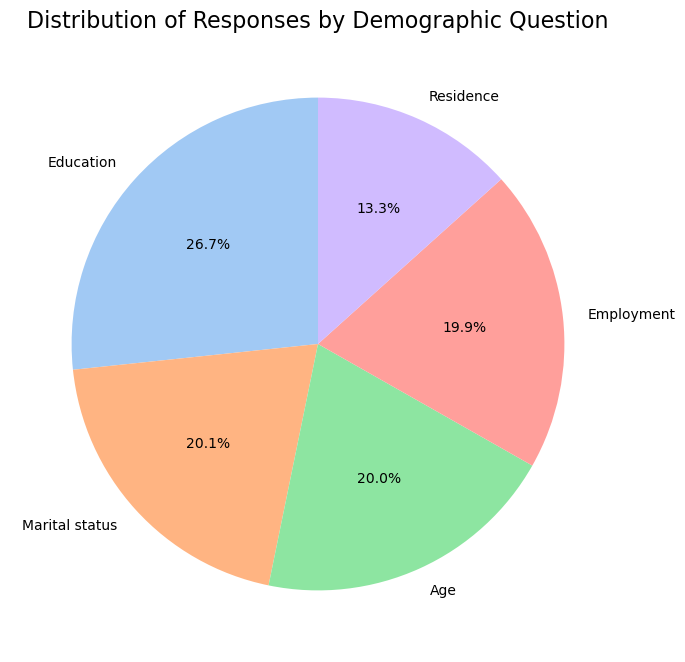

In [14]:
# Calculating the proportion of each demographic question type
# Pie chart for the demographic questions
demographic_question_counts = df['Demographics Question'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(demographic_question_counts, labels=demographic_question_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Responses by Demographic Question', fontsize=16)
plt.show()

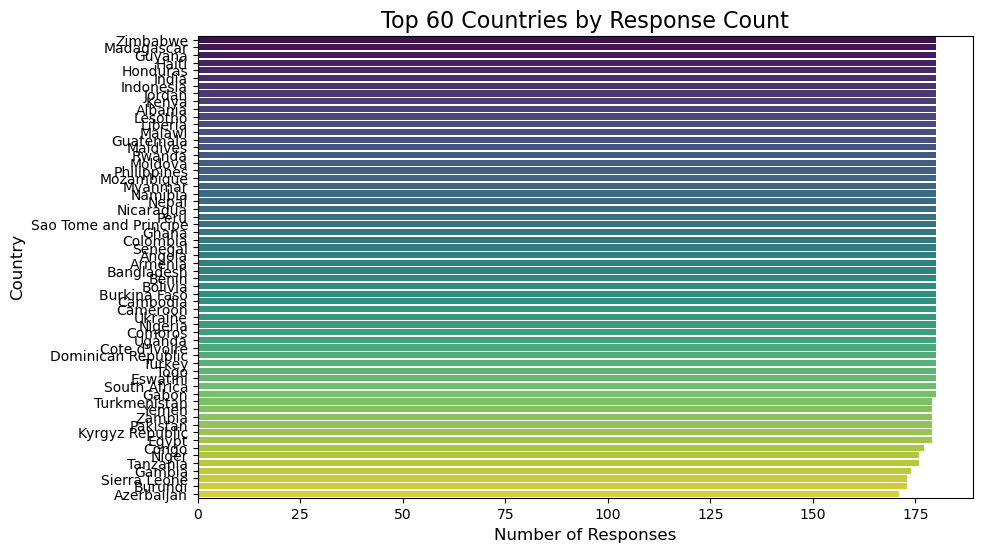

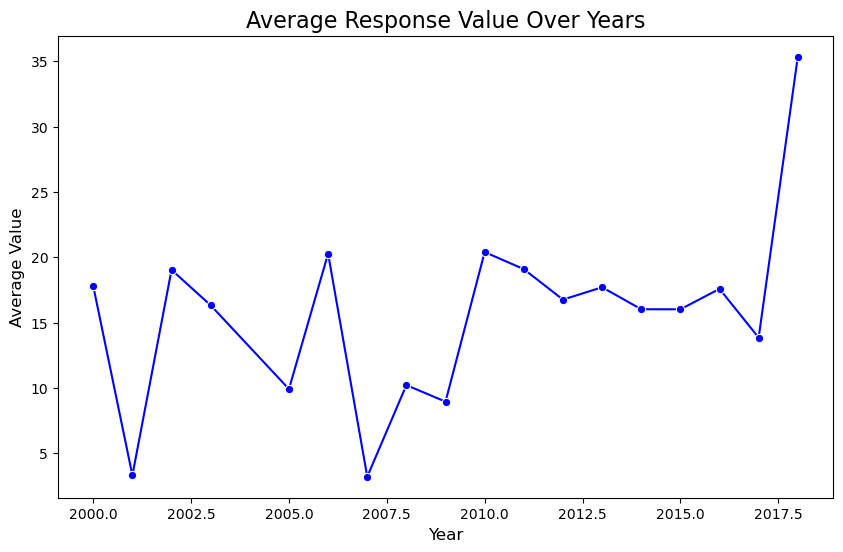

In [12]:
# Distribution of responses by country
country_counts = df['Country'].value_counts().head(60)  # Top 60 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 60 Countries by Response Count', fontsize=16)
plt.xlabel('Number of Responses', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

# Ensuring the 'Survey Year' column is in datetime format
df['Survey Year'] = pd.to_datetime(df['Survey Year'], errors='coerce')
# Checking if the conversion was successful
if df['Survey Year'].isnull().any():
    print("Warning: Some 'Survey Year' values could not be converted to datetime and are set to NaT.")

# Trend of responses over survey years, ensuring 0 values are included in calculations
yearly_trend = df.groupby(df['Survey Year'].dt.year)['Value'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='b')
plt.title('Average Response Value Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.show()

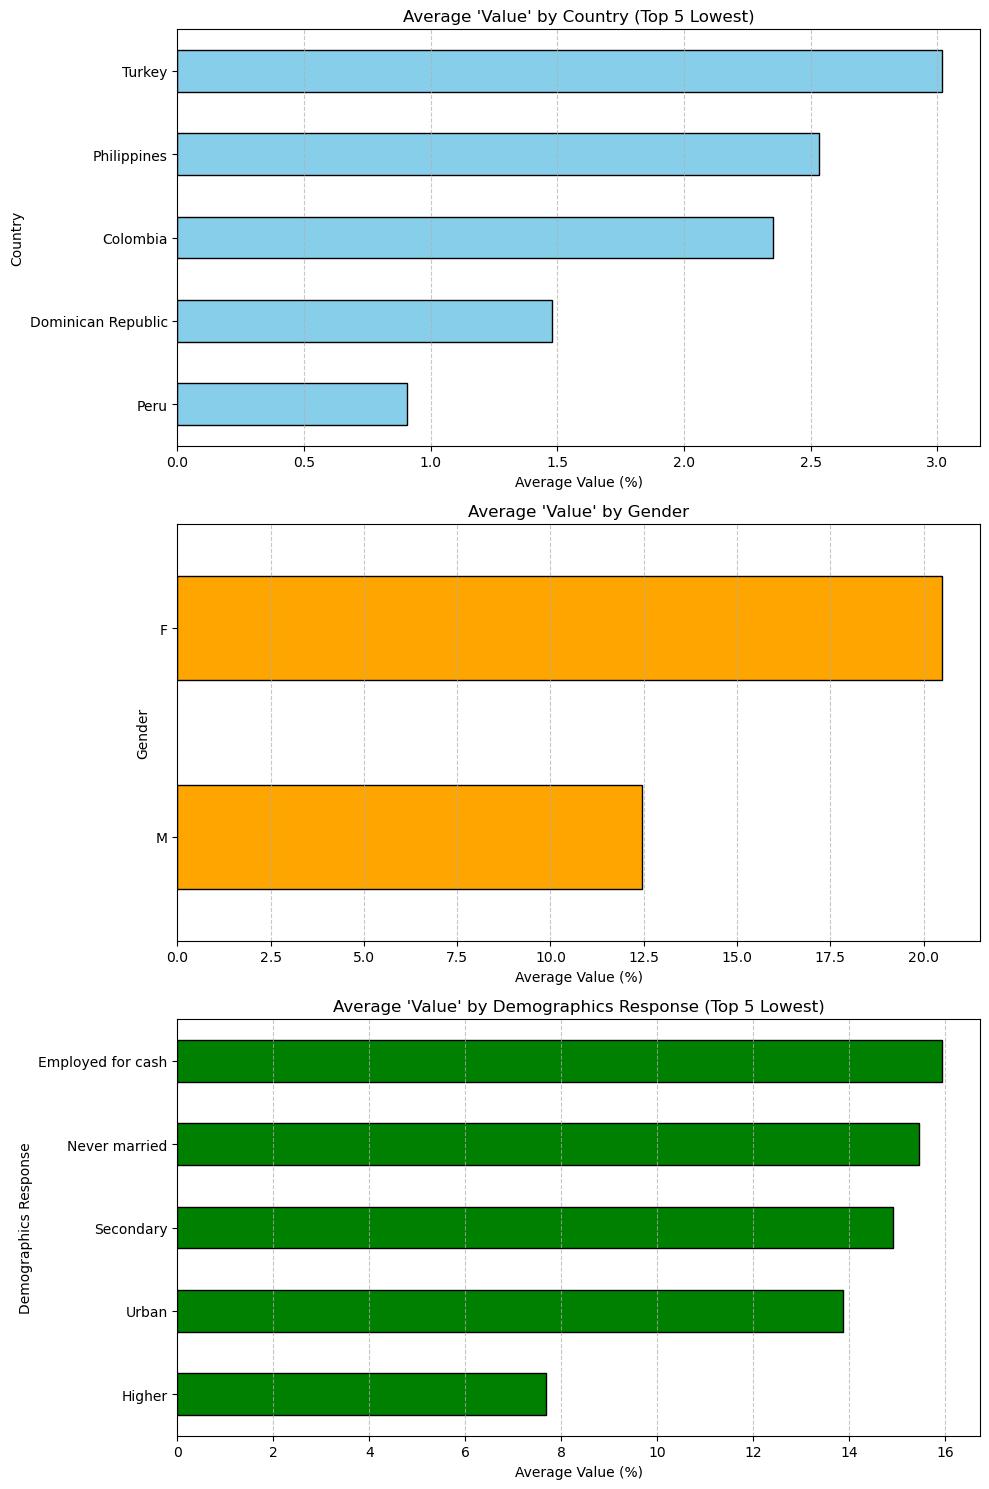

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'cleaned_dataset_0.csv'
data = pd.read_csv(file_path)

# Ensuring 0 values are treated as valid information
# Dropping rows only where 'Value' is NaN (null), not 0
filtered_data = data[~data['Value'].isnull()]

# Grouped results with 0 values included
country_values = filtered_data.groupby('Country')['Value'].mean().sort_values()
gender_values = filtered_data.groupby('Gender')['Value'].mean().sort_values()
demographics_values = (
    filtered_data.groupby('Demographics Response')['Value']
    .mean()
    .sort_values()
)

# Top 5 lowest average "Value" for each group
country_values_lowest = country_values.head(5)
gender_values_lowest = gender_values.head(5)
demographics_values_lowest = demographics_values.head(5)

# Creating a figure for all charts
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plotting average "Value" by country (Top 5 lowest)
country_values_lowest.plot(kind='barh', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Average 'Value' by Country (Top 5 Lowest)")
axes[0].set_xlabel("Average Value (%)")
axes[0].set_ylabel("Country")
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Plotting average "Value" by gender (0 values included)
gender_values_lowest.plot(kind='barh', color='orange', edgecolor='black', ax=axes[1])
axes[1].set_title("Average 'Value' by Gender")
axes[1].set_xlabel("Average Value (%)")
axes[1].set_ylabel("Gender")
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# Plotting average "Value" by demographics response (Top 5 lowest, 0 values included)
demographics_values_lowest.plot(kind='barh', color='green', edgecolor='black', ax=axes[2])
axes[2].set_title("Average 'Value' by Demographics Response (Top 5 Lowest)")
axes[2].set_xlabel("Average Value (%)")
axes[2].set_ylabel("Demographics Response")
axes[2].grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Principal Component Analysis

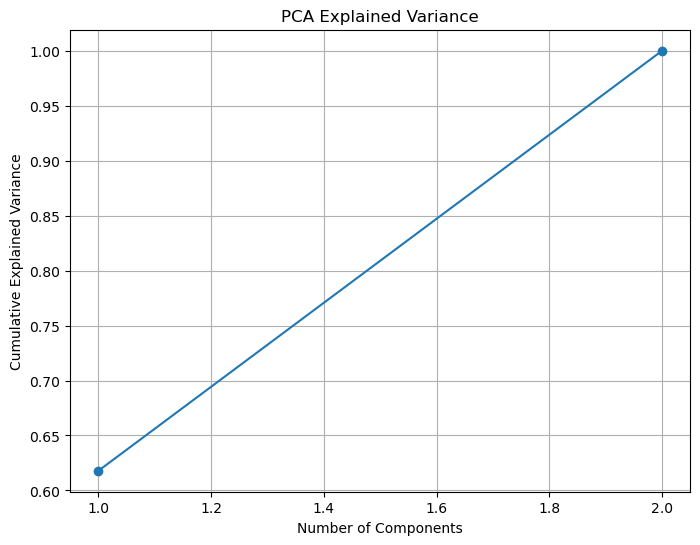

Number of components explaining 95% of variance: 2

Reduced DataFrame:
        PC1       PC2
0 -1.962124  0.466045
1 -1.501678  0.926490
2 -1.337559  1.090610
3 -1.333000  1.095169
4 -1.333000  1.095169


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv("cleaned_dataset_0.csv")

# Selecting numeric columns for PCA
numeric_data = df.select_dtypes(include=[np.number])
if numeric_data.empty:
    raise ValueError("No numeric data found. Ensuring your dataset has numeric columns for PCA.")

# Standardizing the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Applying PCA without specifying components (analyzing explained variance)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Analyzing the explained variance
explained_variance = pca.explained_variance_ratio_

# Plotting explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

# Reducing data to top components
# Selecting the number of components explaining 95% of the variance (or another threshold)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components}")

# Reapplying PCA with selected components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)

# Adding PCA components back to a DataFrame for further analysis
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(n_components)])

# Displaying the reduced data
print("\nReduced DataFrame:")
print(reduced_df.head())



# Explanation of Results

Cleaned Data: After removing missing values and outliers, the dataset is ready for analysis.
EDA: Helps uncover trends, relationships, and patterns.
PCA: Reduces the dataset's complexity while keeping its most important information.

In [ ]:
# Poster Presentation


In [ ]:
#Video Presentation